In [1]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy.stats as ss
from ABC_algorithm import ABC 

def SimulateGK(n, param):  #B>0, K>-1/2 #param is a vector of A, B, g, k
    A, B, g, k = param[0], param[1], param[2], param[3]
    u_values = np.random.uniform(low=0.0, high=1.0, size=n)
    x_values = np.zeros(n)
    for i in range(0,n):
        x_values[i] = A + B*(1+0.8*(1-np.exp(-g*sc.stats.norm.ppf(u_values[i], 0, 1) )) /(1 + np.exp(-g*sc.stats.norm.ppf(u_values[i], 0, 1) ))) *np.power((1+ np.power(sc.stats.norm.ppf(u_values[i], 0, 1),2)),k)*(sc.stats.norm.ppf(u_values[i], 0, 1))    
    return x_values




In [2]:
resultGK = SimulateGK(500,[3,1,2,0.5]) # theta is a vector of dim 4 (A, B, g, k)

/usr/lib64/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib64/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


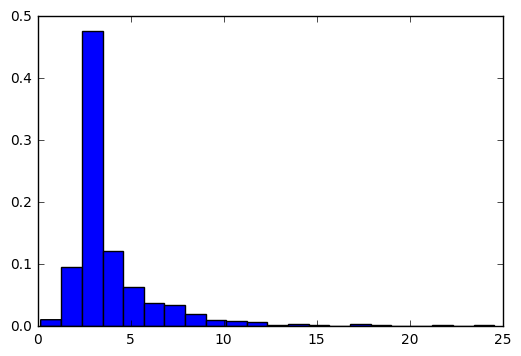

In [3]:
Hist = plt.hist(resultGK, np.round(np.sqrt(len(resultGK)),0), normed=True) #plot the hist for the sampled theta 
plt.show()

In [4]:
data = SimulateGK(10, [3, 1, 2, 0.5])

def GKPriorSampler(n):
    l = []
    for i in range(n):
        l.append(np.random.uniform(low=0.0, high=10.0, size=4)) # we assume uniform [1,10] prior for all 4 parameters
    return l

def GKLiklihoodSimulator(n, param):
    #unknown mean
    return SimulateGK(n, param)
    
def GKSummary(data):
    return np.sort(data)

print np.shape(data)[0]
print GKSummary(data)

10
[  1.93474802   2.28390533   2.48934571   2.57349712   2.60362799
   3.26055721   5.04899574   5.13816637   6.86073493  16.69940118]


In [5]:
######
# run ABC for the GK example
######

df = ABC(GKPriorSampler, GKLiklihoodSimulator, GKSummary, 0.2, data , 10)
print df
######
# plot the accepted and rejected params
######

fig, ax = plt.subplots()

accept_legend_map = {1:'Accepted',0:'Rejected'}
for accept,sub_df in df.groupby('accept'):
    sns.distplot(sub_df.theta, ax=ax, kde = False, label=accept_legend_map[accept]) #norm_hist =True,


plt.axvline(x=post_mean, ymin=0, ymax = 120, linewidth=1, color='k', label='True posterior mean')
plt.legend(loc='upper left')
plt.savefig('plots/1d_normal_abc.pdf')

   accept                                              theta  \
0       0  [7.58676140535, 5.46610941328, 6.660857052, 7....   
1       0  [6.69399609638, 3.53710859202, 9.24854292372, ...   
2       0  [1.86681372301, 2.00001044073, 2.32384308272, ...   
3       0  [5.62232347765, 2.92751367819, 3.62820089285, ...   
4       0  [9.48317013476, 8.40955455847, 3.80702683496, ...   
5       0  [4.81606583284, 0.216248756881, 0.375378971625...   
6       0  [7.97750606194, 0.19470181255, 1.83322867588, ...   
7       0  [5.56609745981, 5.58226741275, 0.604094727261,...   
8       0  [8.16054633441, 8.92003083358, 6.39272454733, ...   
9       0  [4.27092162901, 3.08462670144, 9.41839071456, ...   

                                                   z  
0  [4.82689198256, -1348.47996076, 42476.5305924,...  
1  [6.31842557197, 14.7416423653, 6.67771138258, ...  
2  [699.046288604, 36.6037275663, 385.035679975, ...  
3  [8.39929269765, 216.803427102, -274.493784935,...  
4  [-10.4699294727, 

NameError: name 'sns' is not defined